In [40]:
%matplotlib inline
import numpy as np
import random
import sklearn 
from sklearn.datasets.samples_generator import make_regression
import pylab
from scipy import stats
import matplotlib.pyplot as plt

## Gradient decent

In [16]:
def gradient_descent(alpha, x, y, ep=0.0001, max_iter=10000):
    converged = False
    iter = 0
    m = x.shape[0] # number of samples

    # initial theta
    t0 = np.random.random(x.shape[1])
    t1 = np.random.random(x.shape[1])

    # total error, J(theta)
    J = sum([(t0 + t1*x[i] - y[i])**2 for i in range(m)])

    # Iterate Loop
    while not converged:
        # for each training sample, compute the gradient (d/d_theta j(theta))
        grad0 = 1.0/m * sum([(t0 + t1*x[i] - y[i]) for i in range(m)]) 
        grad1 = 1.0/m * sum([(t0 + t1*x[i] - y[i])*x[i] for i in range(m)])

        # update the theta_temp
        t0 = t0 - alpha * grad0
        t1 = t1 - alpha * grad1

        # mean squared error
        e = sum( [ (t0 + t1*x[i] - y[i])**2 for i in range(m)] ) 

        if abs(J-e) <= ep:
            print 'Converged, iterations: ', iter
            converged = True
    
        J = e   # update error 
        iter += 1  # update iter
    
        if iter == max_iter:
            print 'Max interactions exceeded!'
            converged = True

    return t0,t1

Converged, iterations:  644
theta0 = [-2.8185893] theta1 = [ 43.13917789]
intercept = -2.84963639461 slope= 43.2042438802


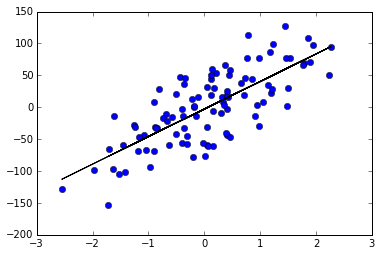

In [17]:
x, y = make_regression(n_samples=100, n_features = 1, n_informative = 1, 
                       random_state = 0, noise = 35)

alpha = 0.01 # learning rate
ep = 0.01 # convergence criteria
theta0, theta1 = gradient_descent(alpha, x, y, ep, max_iter=1000)
print ('theta0 = %s theta1 = %s') %(theta0, theta1) 

# check with scipy linear regression
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x[:,0],y)
print("intercept = %s slope= %s" % (intercept, slope)) 

for i in range(x.shape[0]):
    y_predit = theta0 + theta1*x

pylab.plot(x, y, 'o')
pylab.plot(x, y_predit, 'k-')
pylab.show()

## Gradient decent v.2

In [34]:
def gradient_descent_2(alpha, x, y, num_iterations):
    m = x.shape[0] # number of samples
    theta = np.ones(2)
    x_transpose = x.transpose()
    for iter in range(0, num_iterations):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        J = np.sum(loss ** 2) / (2 * m)  # cost
        print "iter %s | J: %.3f" % (iter, J)      
        gradient = np.dot(x_transpose, loss) / m         
        theta = theta - alpha * gradient  # update
    return theta

iter 0 | J: 1604.873
iter 1 | J: 1586.636
iter 2 | J: 1568.768
iter 3 | J: 1551.261
iter 4 | J: 1534.107
iter 5 | J: 1517.301
iter 6 | J: 1500.833
iter 7 | J: 1484.699
iter 8 | J: 1468.890
iter 9 | J: 1453.401
iter 10 | J: 1438.224
iter 11 | J: 1423.354
iter 12 | J: 1408.785
iter 13 | J: 1394.509
iter 14 | J: 1380.522
iter 15 | J: 1366.817
iter 16 | J: 1353.389
iter 17 | J: 1340.232
iter 18 | J: 1327.341
iter 19 | J: 1314.710
iter 20 | J: 1302.334
iter 21 | J: 1290.207
iter 22 | J: 1278.325
iter 23 | J: 1266.683
iter 24 | J: 1255.276
iter 25 | J: 1244.100
iter 26 | J: 1233.148
iter 27 | J: 1222.418
iter 28 | J: 1211.904
iter 29 | J: 1201.602
iter 30 | J: 1191.507
iter 31 | J: 1181.617
iter 32 | J: 1171.926
iter 33 | J: 1162.430
iter 34 | J: 1153.126
iter 35 | J: 1144.009
iter 36 | J: 1135.076
iter 37 | J: 1126.323
iter 38 | J: 1117.747
iter 39 | J: 1109.343
iter 40 | J: 1101.109
iter 41 | J: 1093.041
iter 42 | J: 1085.135
iter 43 | J: 1077.389
iter 44 | J: 1069.799
iter 45 | J: 1062.36

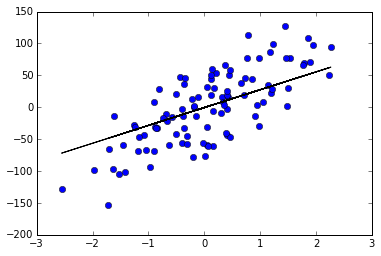

In [36]:
x, y = make_regression(n_samples=100, n_features = 1, n_informative=1,
                      random_state=0, noise=35)

m, n = np.shape(x)
x = np.c_[ np.ones(m), x] 
alpha = 0.01
theta = gradient_descent_2(alpha, x, y, 100)

for i in range(x.shape[1]):
    y_predict = theta[0] + theta[1] * x

pylab.plot(x[:, 1], y, 'o')
pylab.plot(x,y_predict, 'k-')
pylab.show()

## Gradient descent v3

Local minimum occurs at 3.05


/Users/b3j90/anaconda/envs/nlp/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


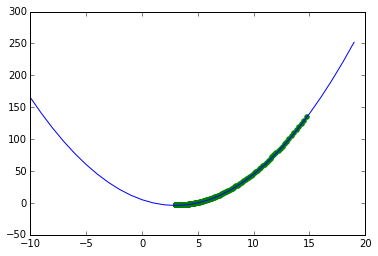

In [55]:
old_min = 0
temp_min = 15
step_size = 0.01
precision = 0.001

def f(x):
    return x**2 - 6*x +5

def f_derivative(x):
    return 2*x-6

mins = []
cost = []

while abs(temp_min - old_min) > precision:
    old_min = temp_min
    gradient = f_derivative(old_min)
    move = gradient * step_size
    temp_min = old_min - move
    cost.append((3-temp_min)**2)
    mins.append(temp_min)
    
print("Local minimum occurs at {}".format(round(temp_min, 2)))
x = np.arange(-10,20, 1)
plt.xlim((-10,20))
plt.plot(x, f(x), color = 'b')
plt.scatter(mins, f(np.asarray(mins)), color='g')
plt.show()